In [1]:
require(tidyverse)
require(party)
require(mgcv)
require(lattice)
require(languageR)
require(repr)
require(itsadug)

Loading required package: tidyverse

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

√ ggplot2 3.3.1     √ purrr   0.3.4
√ tibble  3.0.1     √ dplyr   1.0.0
√ tidyr   1.1.0     √ stringr 1.4.0
√ readr   1.3.1     √ forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Loading required package: party

Loading required package: grid

Loading required package: mvtnorm

Loading required package: modeltools

Loading required package: stats4

Loading required package: strucchange

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: sandwich


Attaching package: 'strucchange'


The following object is masked from 'package:stringr':

    boundary


Loading required package: mgcv

Loading required package: nlme


Attaching pac

## Naming data

Chang, Y.-N., Hsu, C.-H., Tsai, J.-L., Chen, C.-L., & Lee, C.-Y. (2016). A psycholinguistic database for traditional Chinese character naming. Behavior Research Methods, 48(1), 112-122. (SSCI)
https://pubmed.ncbi.nlm.nih.gov/25630311/

In [2]:
naming = read_csv("../data/merged_naming_data.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  Character = col_character(),
  zhuyin = col_character(),
  `Phonetic Component` = col_character(),
  `Semantic Component` = col_character(),
  word = col_character()
)

See spec(...) for full column specifications.



In [4]:
names(naming)

[1] "Character"                 "zhuyin"                   
 [3] "Phonetic Component"        "Semantic Component"       
 [5] "Frequency"                 "Consistency (type)"       
 [7] "Consistency (token)"       "Regularity"               
 [9] "Homophone Density"         "Phonetic Combinability"   
[11] "Semantic Combinability"    "Stroke"                   
[13] "Familiarity"               "Semantic Ambiguity Rating"
[15] "NC1"                       "NC2"                      
[17] "Naming Acc"                "RT"                       
[19] "word"                      "n_sense"                  
[21] "log_n_sense"               "n_tagged"                 
[23] "sfreq_sum"                 "sfreq_max"                
[25] "sfreq_std"                 "sfreq_ent"                
[27] "sfreq_ent_norm"            "vol_raw"                  
[29] "vol_cen"                   "vol_cennorm"              
[31] "Stop"                      "Affricate"                
[33] "Fricative"                 "Nasal"                    
[35] "Liquid"                    "Aspirated"                
[37] "Voiced"                    "Bilabial"                 
[39] "LabioDental"               "Alveolar"                 
[41] "PalatalAlveolar"           "AlveloPalatal"            
[43] "Velar"                     "Vowel"                    
[45] "log_freq"                  "RTinv"                    
[47] "sf_rmax"                   "mw_nV"                    
[49] "mw_nE"                     "mw_weightD"               
[51] "mw_D"                      "rEV"                      
[53] "CD"                        "Log CD"                   
[55] "SemD"                      "SemVar"                   
[57] "SemVarRes"                 "Witin-group distance"     
[59] "Between-group distance"

In [6]:
install.packages("ica")

Installing package into 'C:/Users/seantyh/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'ica' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\seantyh\AppData\Local\Temp\Rtmp8eG3Fx\downloaded_packages


In [7]:
require(ica)

Loading required package: ica


Attaching package: 'ica'


The following object is masked from 'package:mgcv':

    sdiag




In [20]:
m = bam(log_freq~te(log_n_sense, mw_weightD, rEV), data=naming[,c(
    "log_freq", "log_n_sense", "mw_weightD", "rEV")])

In [26]:
summary(m)


Family: gaussian 
Link function: identity 

Formula:
log_freq ~ te(log_n_sense, mw_weightD, rEV)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.86407    0.04827   142.2   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                                edf Ref.df    F p-value    
te(log_n_sense,mw_weightD,rEV) 14.4  17.49 16.8  <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.215   Deviance explained = 22.6%
fREML = 1958.8  Scale est. = 2.4537    n = 1053

In [34]:
seq(0.25,0.75,0.25)

[1] 0.25 0.50 0.75

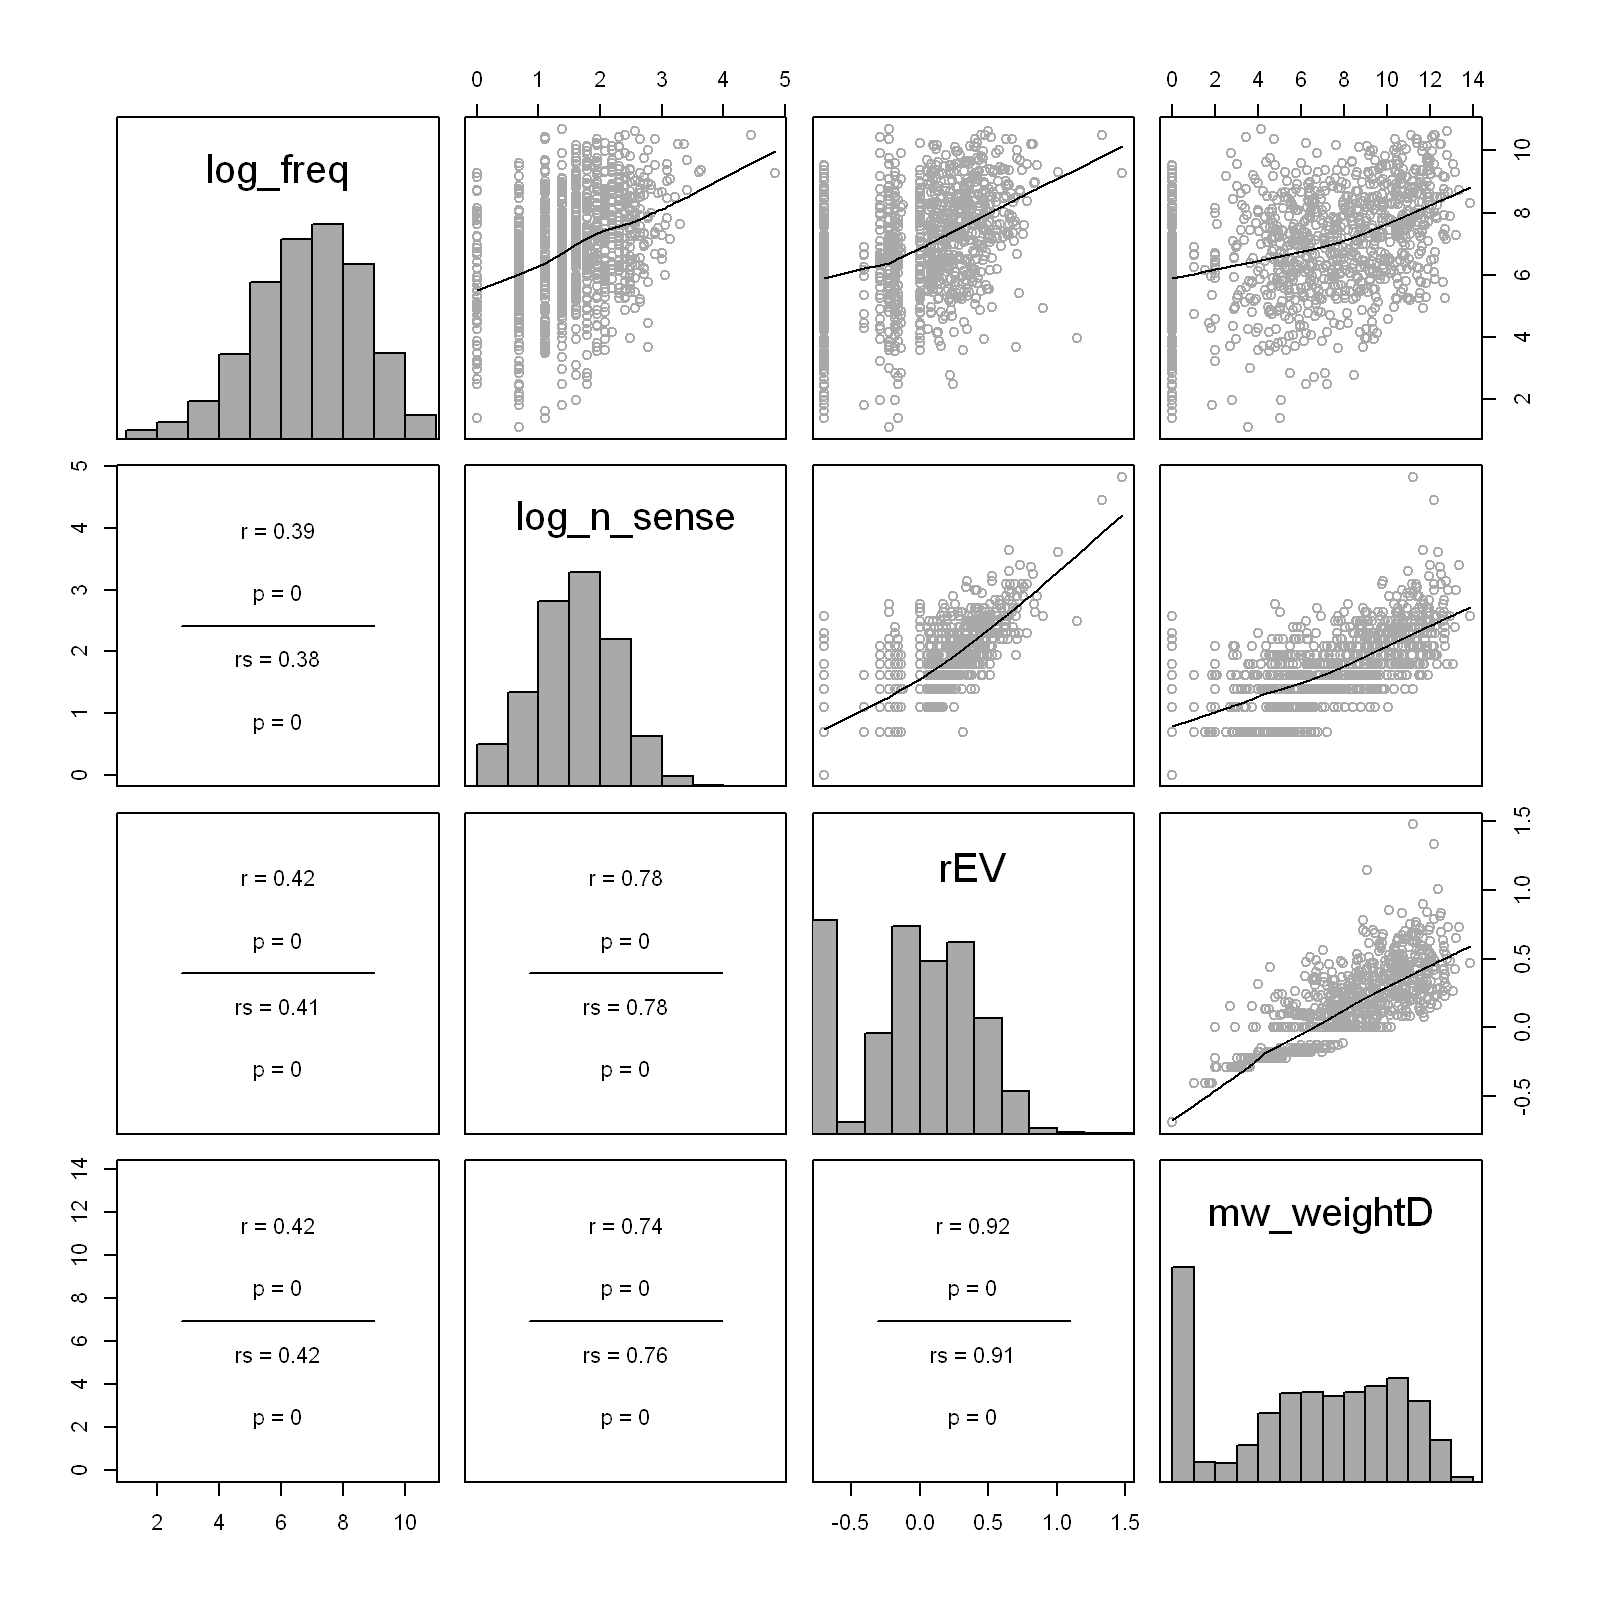

In [119]:
options(repr.plot.width=8, repr.plot.height=8, repr.plot.res=200)
pairscor.fnc(naming[,c("log_freq", "log_n_sense", "rEV", "mw_weightD")])

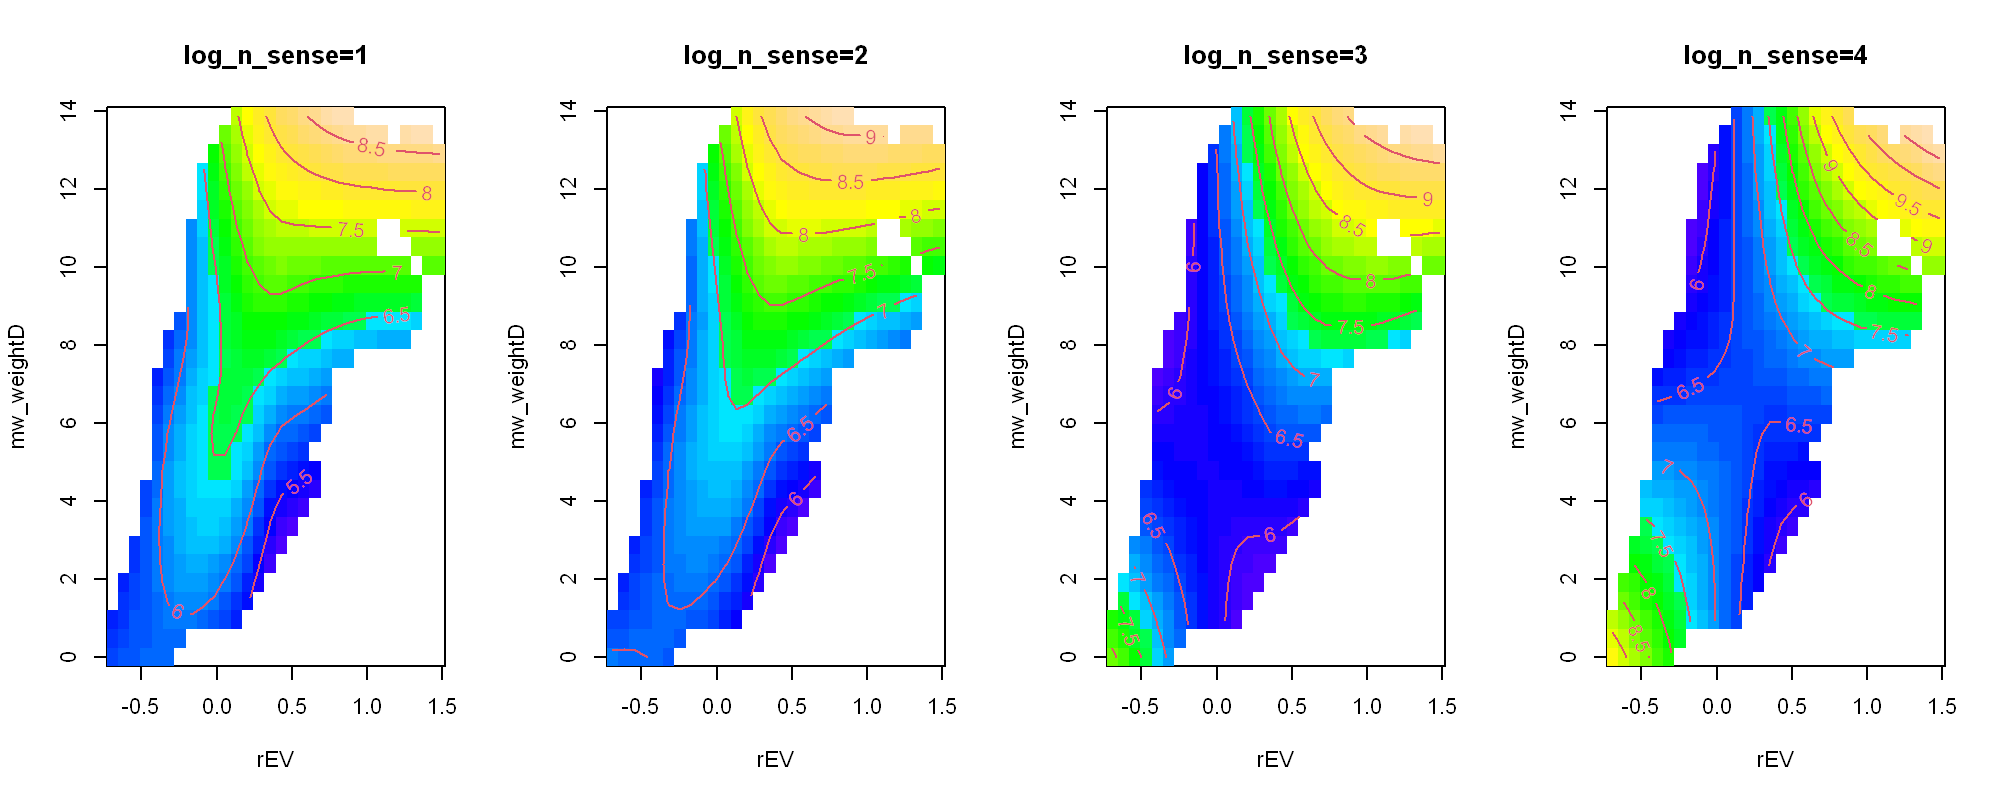

In [116]:
options(repr.plot.width=10, repr.plot.height=4, repr.plot.res=200)
par(mfrow=c(1, 4))
qs=c(1,2,3,4)
for (q in qs){            
    vis.gam(m, view=c("rEV", "mw_weightD"), cex=4, plot.type="contour", color="topo", 
        cond=list(log_n_sense=q), too.far=0.1, main=sprintf("log_n_sense=%d", q))
}


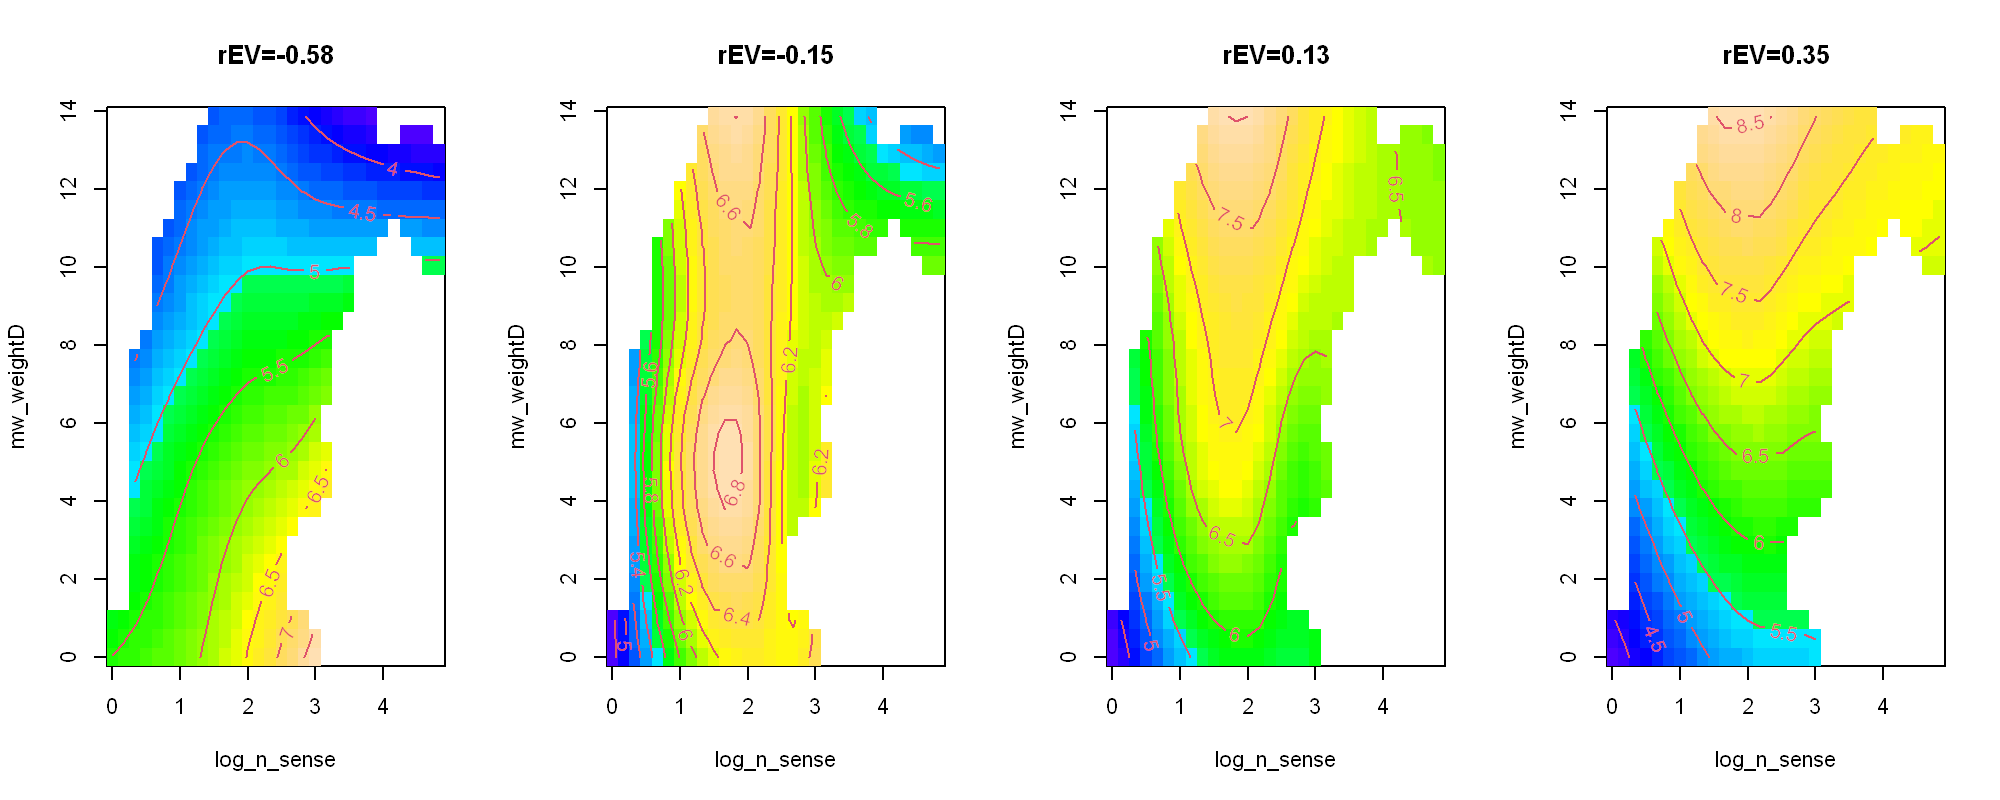

In [107]:
options(repr.plot.width=10, repr.plot.height=4, repr.plot.res=200)
par(mfrow=c(1, 4))
qs=quantile(naming$rEV, seq(0.2, 0.8, 0.2))
for (q in qs){            
    vis.gam(m, view=c("log_n_sense", "mw_weightD"), cex=4, plot.type="contour", color="topo", 
        cond=list(rEV=q), too.far=0.1, main=sprintf("rEV=%.2f", q))
}


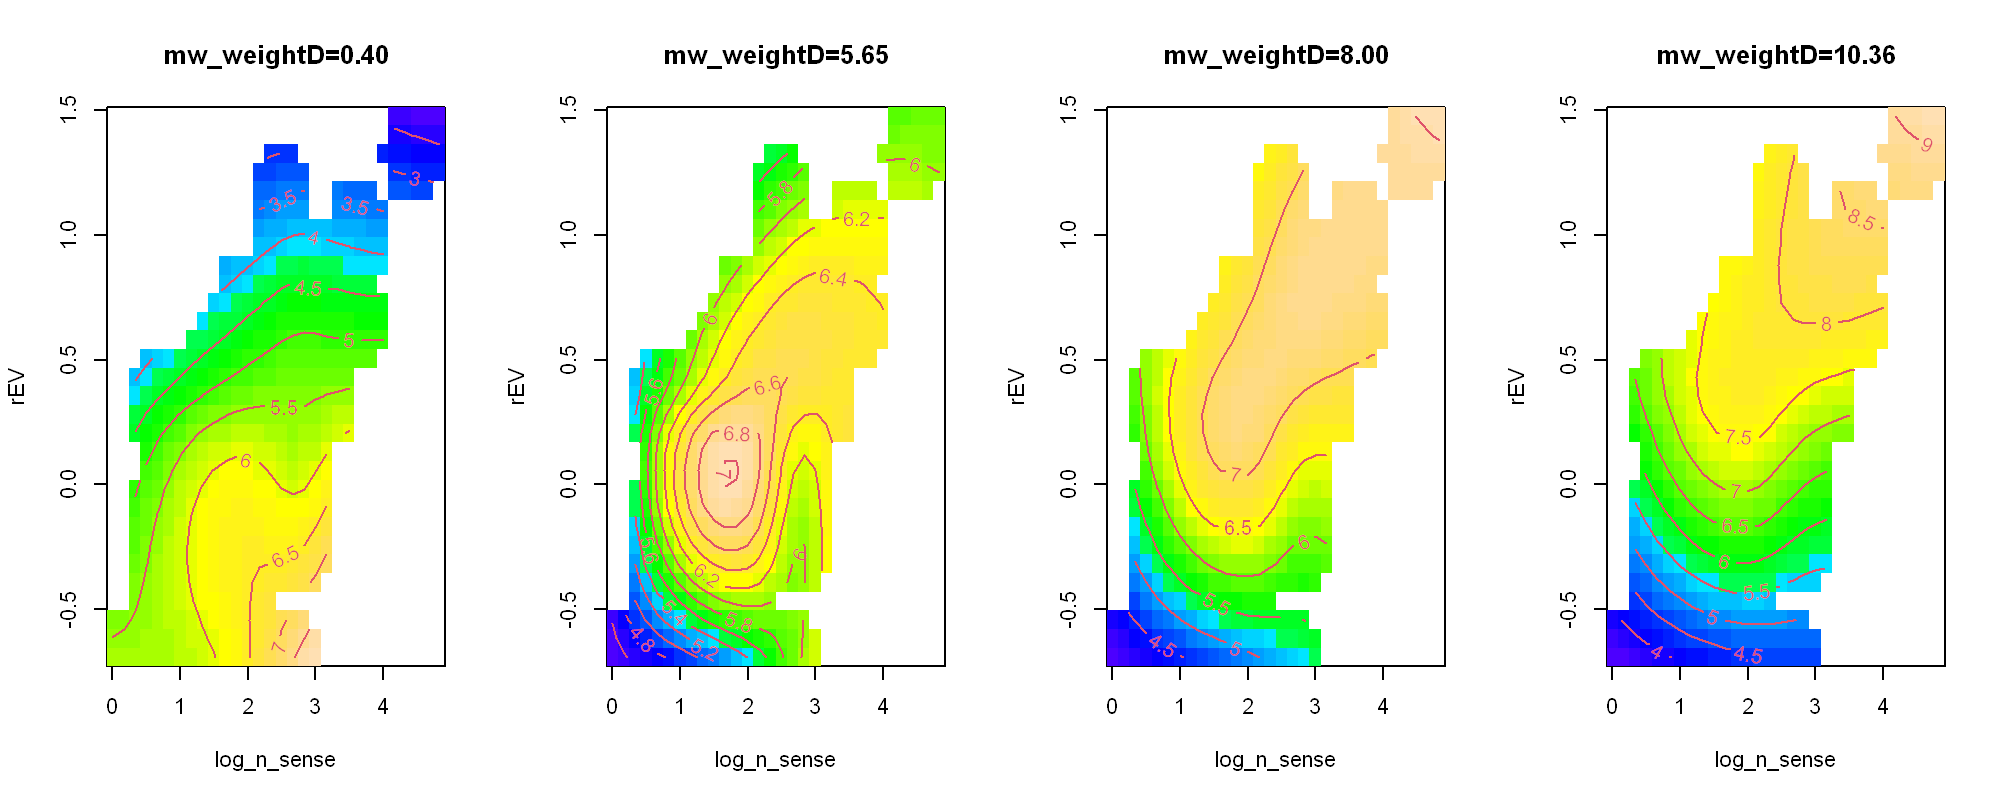

In [114]:
options(repr.plot.width=10, repr.plot.height=4, repr.plot.res=200)
par(mfrow=c(1, 4))
qs=quantile(naming$mw_weightD, seq(0.2, 0.8, 0.2))
for (q in qs){            
    vis.gam(m, view=c("log_n_sense", "rEV"), cex=4, plot.type="contour", color="topo", 
        cond=list(mw_weightD=q), too.far=0.1, main=sprintf("mw_weightD=%.2f", q))
}


In [108]:
m1 = bam(log_n_sense~te(mw_weightD, rEV), data=naming)

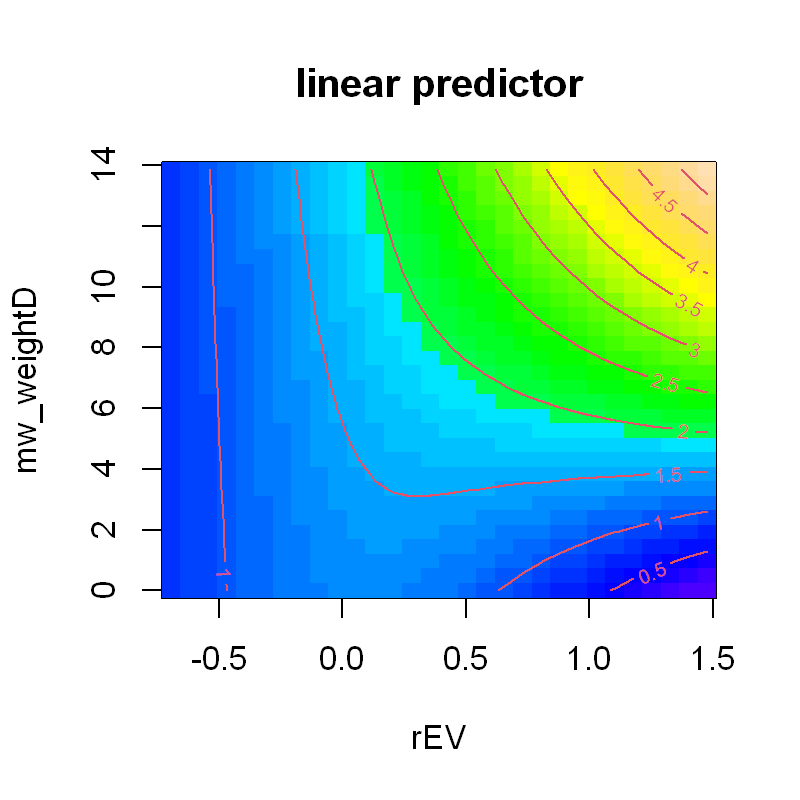

In [113]:
options(repr.plot.width=4, repr.plot.height=4, repr.plot.res=200)
qs=quantile(naming$rEV, seq(0.2, 0.8, 0.2))
vis.gam(m1, view=c("rEV", "mw_weightD"), cex=4, plot.type="contour", color="topo")

